## Install dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [3]:
import tensorflow as tf
import os

C:\Users\salvi\AppData\Roaming\Python\Python310\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

## Remove Dodgy Images

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data' 

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\05-12-21-happy-people.jpg
Issue with image data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with image data\happy\1-2.jpg
Issue with image data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with image data\happy\154006829.jpg
Issue with image data\happy\170404-happy-workers-feature.jpg
Issue with image data\happy\1902539.jpg
Issue with image data\happy\1902540.jpg
Issue with image data\happy\1902587.jpg
Issue with image data\happy\1920px-face-smile.svg_.png.jpg
Issue with image data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with image data\happy\227-2271622_happy-people-business-team-celebrating-png.png
Issue with image data\happy\60632274._UY200_.jpg
Issue with image data\happy\7-Habits-of-Happy-People-image.jpeg
Issue with image data\happy\7-principles-of-successful-and-happy-people.png
Issue with image data\happy\7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg


Issue with image data\sad\504212.jpg
Issue with image data\sad\51079685_M-1280x429.jpg
Issue with image data\sad\51079685_M.jpg
Issue with image data\sad\52672678._SX318_SY475_.jpg
Issue with image data\sad\5360f7e3f9a01bb1aa10654514442436.500x500x1.jpg
Issue with image data\sad\6-Best-and-worst-things-to-say.jpg
Issue with image data\sad\73705bd7debb66c2afc780a22c223804.jpg
Issue with image data\sad\766x415_Depression_vs_Sadness.jpg
Issue with image data\sad\7RNXwSxCAKL8vGtXG2ZkyD.jpg
Issue with image data\sad\8iAb9k4aT.jpg
Issue with image data\sad\ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg
Issue with image data\sad\AdobeStock_221688877-copy.jpg
Issue with image data\sad\artworks-inq7uS3bz9CqNd3d-fqs6TA-t500x500.jpg
Issue with image data\sad\artworks-pQBql6xWFe6JFOp4-FRtE5g-t500x500.jpg
Issue with image data\sad\at-home-sad-sofa-300x200.jpg
Issue with image data\sad\b11b520b0818895ae5563d1e70294052.jpg
Issue with image data\sad\b2ap3_large_happy-sad-unsplash-850x575.j

## Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

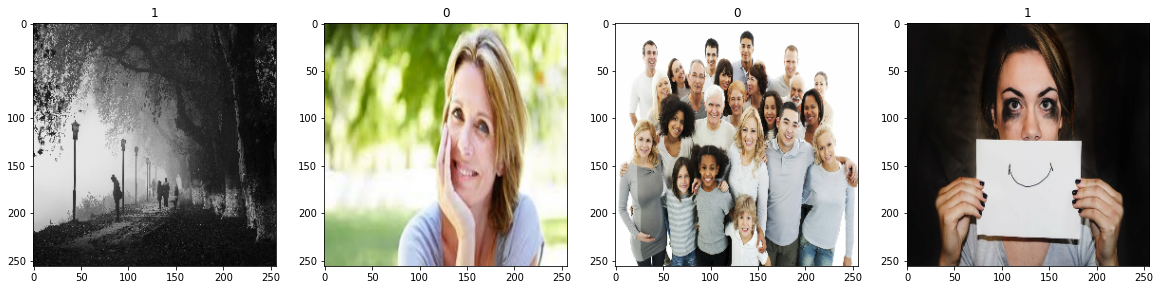

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.8509804 , 0.7411765 , 0.65882355],
          [0.8526654 , 0.7428615 , 0.66017157],
          [0.86032474, 0.7505208 , 0.66629905],
          ...,
          [0.44500613, 0.3744179 , 0.33520222],
          [0.44347426, 0.37288603, 0.33367035],
          [0.44313726, 0.37254903, 0.33333334]],
 
         [[0.8513174 , 0.7415135 , 0.65916055],
          [0.8530024 , 0.7431985 , 0.6605086 ],
          [0.86066175, 0.75085783, 0.66663605],
          ...,
          [0.44500613, 0.3744179 , 0.33520222],
          [0.44347426, 0.37288603, 0.33367035],
          [0.44313726, 0.37254903, 0.33333334]],
 
         [[0.85284925, 0.74304533, 0.6606924 ],
          [0.8545343 , 0.7447304 , 0.6620404 ],
          [0.86219364, 0.7523897 , 0.6681679 ],
          ...,
          [0.44500613, 0.3744179 , 0.33520222],
          [0.44347426, 0.37288603, 0.33367035],
          [0.44313726, 0.37254903, 0.33333334]],
 
         ...,
 
         [[0.9411765 , 0.9254902 , 0.92156863],
          [0.94117

## Split Data

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

7

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Build Deep Learning Model

In [19]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Train

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 12s 1s/step - loss: 1.9093 - accuracy: 0.4866 - val_loss: 0.6412 - val_accuracy: 0.5625
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 0.6789 - accuracy: 0.5714 - val_loss: 0.6713 - val_accuracy: 0.6250
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.6656 - accuracy: 0.5580 - val_loss: 0.6429 - val_accuracy: 0.5938
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 0.6161 - accuracy: 0.6741 - val_loss: 0.7153 - val_accuracy: 0.5312
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.5958 - accuracy: 0.6562 - val_loss: 0.5284 - val_accuracy: 0.7188
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.5280 - accuracy: 0.7812 - val_loss: 0.4453 - val_accuracy: 0.7188
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.4642 - accuracy: 0.7500 - val_loss: 0.3588 - val_accuracy: 0.8438
Epoch 8/20
7/7 [===================

## Plot Performance

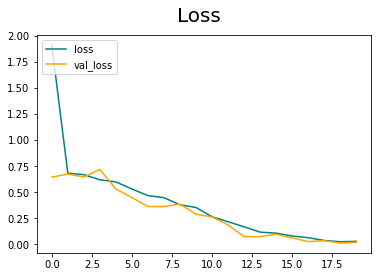

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

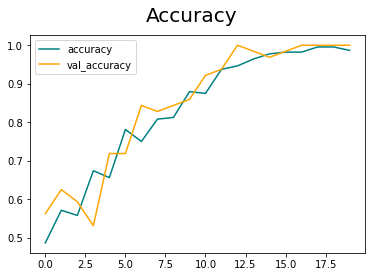

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 248ms/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## Test

In [34]:
import cv2

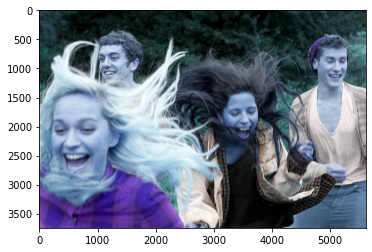

In [35]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

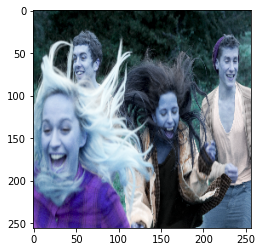

In [36]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 52ms/step


In [38]:
yhat

array([[0.02796289]], dtype=float32)

In [39]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [40]:
from tensorflow.keras.models import load_model

In [43]:
model.save(os.path.join('models','imageclassifier.h5'))

In [45]:
new_model = load_model('models/imageclassifier.h5')

In [46]:
model.save(os.path.join('models', 'imageclassifier.h5'))

In [47]:
import os
os.makedirs('models', exist_ok=True)
model.save(os.path.join('models', 'imageclassifier.h5'))

In [48]:
import os
print(os.listdir())

['.git', '.gitignore', '.ipynb_checkpoints', '154006829.jpg', '8iAb9k4aT.jpg', 'data', 'Getting Started.ipynb', 'Image classification.ipynb', 'imageclassification', 'logs', 'models']
